# Problem Understanding
- Nama Proyek : Prediksi popularitas Restoran
- Link Dataset : https://www.kaggle.com/datasets/bhanupratapbiswas/zomato
- Tujuan :

*   Memprediksi popularitas suatu restoran berdasarkan Rating yang didapatkan,
*   Mencari Rata-rata dari Dining Rating dan Delivery Rating






# 1. Mempersiapkan Library

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# 2. Data Collection

In [13]:
uploaded = files.upload()

Saving Restaurants.csv to Restaurants (1).csv


In [3]:
df = pd.read_csv('Restaurants.csv')
df.head()

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,Address,Phone_No,Latitude,Longitude,Known_For2,Known_For22
0,Rustom's,"Parsi, Street Food, North Indian, Desserts, Be...",2100,"ITO, New Delhi",4.9,1885,4.4,1844,https://www.zomato.com/ncr/rustoms-ito-new-delhi,"Delhi Parsi Anjuman, LNJP Colony, Bahadur Shah...",9.1991E+11,28.638167,77.240472,NaN,NaN
1,Cafe Lota,"Cafe, South Indian, North Indian, Beverages",1200,"Pragati Maidan, New Delhi",4.9,3748,3.9,37,https://www.zomato.com/ncr/cafe-lota-pragati-m...,"National Crafts Museum, Gate 2, Bhairon Marg, ...",9.17839E+11,28.613429,77.242471,"Pondicherry Fish Curry, Coconut Rabdi, Sabudan...","Artistic Decor, The Service, Natural Ambience,..."
2,Dum-Pukht - ITC Maurya,"Mughlai, North Indian, Desserts",5000,"ITC Maurya, Chanakyapuri, New Delhi",4.9,1371,NaN,0,https://www.zomato.com/ncr/dum-pukht-itc-maury...,"ITC Maurya, Chanakyapuri, New Delhi",9.11146E+11,28.598200,77.173661,"Royal ambiance and Mughlai cuisine, also recei...",NaN
3,Burma Burma,"Asian, Burmese, Bubble Tea, Desserts, Salad",1600,"Cyber Hub, DLF Cyber City, Gurgaon",4.9,2636,4.4,1238,https://www.zomato.com/ncr/burma-burma-dlf-cyb...,"Shop 6, Ground Floor, Building 8, Tower C, Cyb...",9.11244E+11,28.494464,77.088532,"Coconut Milk Dessert, Honey Caviar, Kaffir Lim...","Knowledgeable Staff, Authentic, Soothing Ambie..."
4,The Big Chill,"Continental, American, Italian",1500,"Khan Market, New Delhi",4.9,6487,NaN,0,https://www.zomato.com/ncr/the-big-chill-khan-...,"68-A, Khan Market, New Delhi",9.11142E+11,28.600350,77.227493,"Irish Cream Tiramisu, Penne Vodka, Mississippi...","Retro Ambience, Yummy Desserts, Big Portions, ..."


# 3. Data Exploration

Pada bagian ini, berfungsi untuk mempersiapkan dataset agar dapat kita gunakan nantinya.

## 1. Menghilangkan missing value

In [4]:
df.isnull().sum()

,0
Restaurant_Name,0
Category,0
Pricing_for_2,0
Locality,0
Dining_Rating,0
Dining_Review_Count,0
Delivery_Rating,402
Delivery_Rating_Count,0
Website,0
Address,0


## Informasi Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant_Name        1965 non-null   object 
 1   Category               1965 non-null   object 
 2   Pricing_for_2          1965 non-null   int64  
 3   Locality               1965 non-null   object 
 4   Dining_Rating          1965 non-null   float64
 5   Dining_Review_Count    1965 non-null   int64  
 6   Delivery_Rating        1563 non-null   float64
 7   Delivery_Rating_Count  1965 non-null   int64  
 8   Website                1965 non-null   object 
 9   Address                1965 non-null   object 
 10  Phone_No               1965 non-null   object 
 11  Latitude               1965 non-null   float64
 12  Longitude              1965 non-null   float64
 13  Known_For2             1560 non-null   object 
 14  Known_For22            1124 non-null   object 
dtypes: f

## Statistik Deskriptif

In [6]:
df.describe()

,Pricing_for_2,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Latitude,Longitude
count,1965.000000,1965.000000,1965.000000,1563.000000,1965.000000,1965.000000,1965.000000
mean,1090.687023,4.140000,721.954198,3.964299,3029.550636,28.549542,77.161570
std,934.481617,0.202147,932.618839,0.242305,6529.839896,0.784241,1.685399
min,100.000000,3.900000,3.000000,2.800000,0.000000,-5.975200,2.650463
25%,500.000000,4.000000,244.000000,3.800000,34.000000,28.496564,77.100745
50%,700.000000,4.100000,433.000000,4.000000,604.000000,28.567882,77.201558
75%,1500.000000,4.300000,842.000000,4.100000,3316.000000,28.635845,77.258408
max,8000.000000,4.900000,10100.000000,4.500000,87700.000000,29.065189,77.536009


informasi yang dapat kita ambil


1.   Dining rating memiliki nilai maksimal 4.9 dengan rata-rata 4.1
2.   Delivery rating memiliki nilai maksimal 4.5 dengan rata-rata 3.9
3.   Nilai Dining Review Count dan Dining Rating Count memiliki nilai yang sangat berbeda dan terdapat outlier



## Menghilangkan kolom tidak penting

In [7]:
df = df.drop(['Website','Phone_No','Latitude','Longitude','Known_For2','Known_For22','Address','Restaurant_Name'], axis=1)
df.head()

,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count
0,"Parsi, Street Food, North Indian, Desserts, Be...",2100,"ITO, New Delhi",4.9,1885,4.4,1844
1,"Cafe, South Indian, North Indian, Beverages",1200,"Pragati Maidan, New Delhi",4.9,3748,3.9,37
2,"Mughlai, North Indian, Desserts",5000,"ITC Maurya, Chanakyapuri, New Delhi",4.9,1371,NaN,0
3,"Asian, Burmese, Bubble Tea, Desserts, Salad",1600,"Cyber Hub, DLF Cyber City, Gurgaon",4.9,2636,4.4,1238
4,"Continental, American, Italian",1500,"Khan Market, New Delhi",4.9,6487,NaN,0


### Menghilangkan kolum diatas berguna untuk memaksimalkan model machine learning, karena model ini akan berfokus pada rating restoran

## Menghilangkan kolom NAN di Delivery_Rating

In [8]:
df['Delivery_Rating']=df['Delivery_Rating'].fillna(df['Delivery_Rating'].mean())

### Mengisi kolom NAN pada delivery rating dengan mean adalah solusi terbaik untuk kolum ini

## Mengecek kolom Duplikasi

In [9]:
df.duplicated().sum()

np.int64(0)

## Mengubah Type Data

In [ ]:
# Mengubah kolom object menjadi category
df['Locality'] = df['Locality'].astype('category')
df['Category'] = df['Category'].astype('category')

### mengubah kolom menjadi bertype category berfungsi untuk memudahkan model dalam melakukan encoding nantinya

### Penanganan Outlier

In [10]:
lower_percentile = df['Dining_Review_Count'].quantile(0.05)
upper_percentile = df['Dining_Review_Count'].quantile(0.95)

df['Dining_Review_Count'] = df['Dining_Review_Count'].clip(lower=lower_percentile, upper=upper_percentile)
display(df['Dining_Review_Count'].describe())

,Dining_Review_Count
count,1965.000000
mean,645.465140
std,586.327878
min,105.200000
25%,244.000000
50%,433.000000
75%,842.000000
max,2333.800000


In [11]:
# menghilangkan outlier di delivery rating count
lower_percentile = df['Delivery_Rating_Count'].quantile(0.05)
upper_percentile = df['Delivery_Rating_Count'].quantile(0.95)

pd.set_option('future.no_silent_downcasting', True)
df['Delivery_Rating_Count'] = df['Delivery_Rating_Count'].clip(lower=lower_percentile, upper=upper_percentile)
display(df['Delivery_Rating_Count'].describe())

,Delivery_Rating_Count
count,1965.000000
mean,2477.001018
std,3706.861924
min,0.000000
25%,34.000000
50%,604.000000
75%,3316.000000
max,13060.000000


### Penanganan outlier pada Dining Review Count dan Delivery Rating Count, mengunakan batas atas dan batas bawah, dimana nila batas yang melebihi batas atas dan kurang dari batas bawah akan diubah

## Visualisasi EDA

Mencari karakteristik dataset dengan melihat hubungan antar kolum melalui diagram.

### Kolum Dining Rating

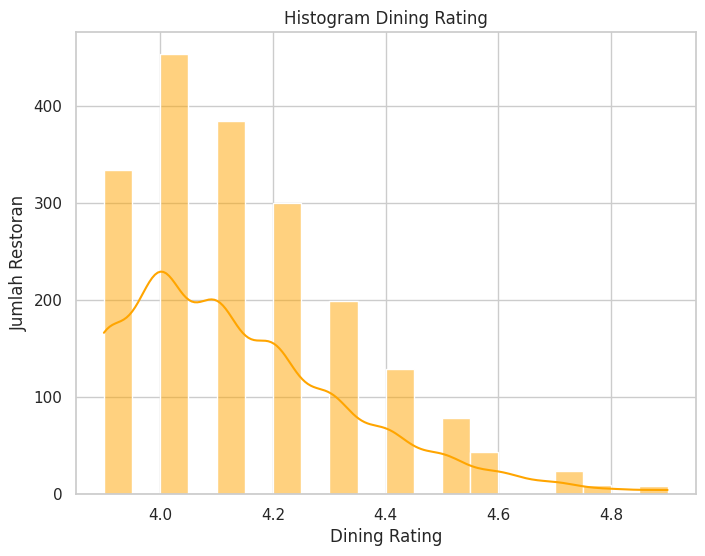

In [ ]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 6)

plt.figure()
sns.histplot(df['Dining_Rating'].dropna(), bins=20, kde=True, color='orange')
plt.title('Histogram Dining Rating')
plt.xlabel('Dining Rating')
plt.ylabel('Jumlah Restoran')
plt.show()

Terdapat tren penurunan jumlah rating restoran mulai dari rating 4.1 ke atas

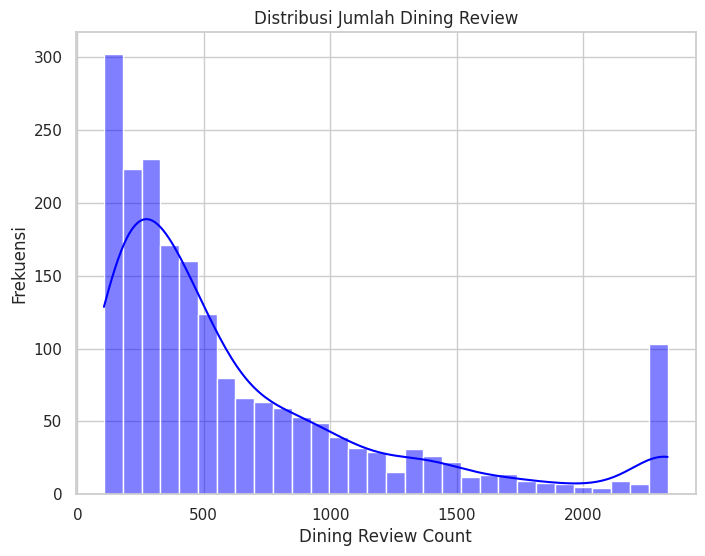

In [ ]:
plt.figure()
sns.histplot(df['Dining_Review_Count'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribusi Jumlah Dining Review')
plt.xlabel('Dining Review Count')
plt.ylabel('Frekuensi')
plt.show()

 Dapat dilihat kalau kebanyakan restaurant memiliki review antara 100 sampai 500 review, terdapat kenaikan tajam di review ke 2400 sebagai akibat dari penanganan outlier

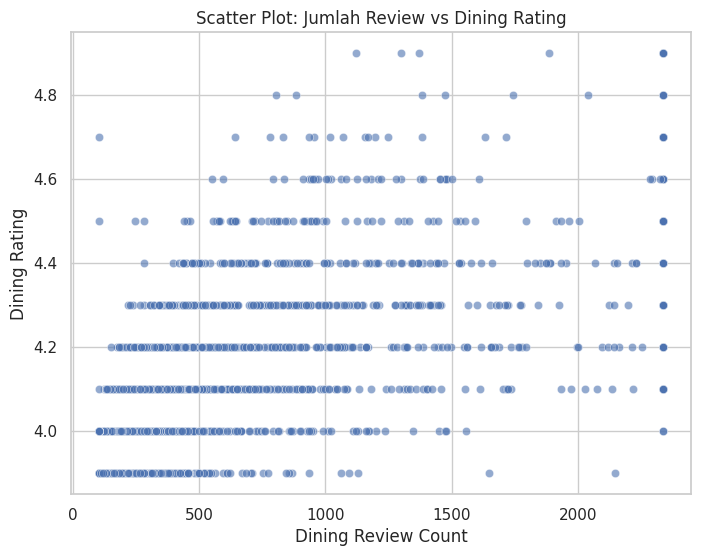

In [ ]:
plt.figure()
sns.scatterplot(x='Dining_Review_Count', y='Dining_Rating', data=df, alpha=0.6)
plt.title('Scatter Plot: Jumlah Review vs Dining Rating')
plt.xlabel('Dining Review Count')
plt.ylabel('Dining Rating')
plt.show()

Terdapat penumpukan titik di nilai antara 0-500 menunjukan kalau ,kebanyakan restoran memiliki jumlah rating antara 0-500

### Kolum Delivery Rating dan Delivery Rating Count

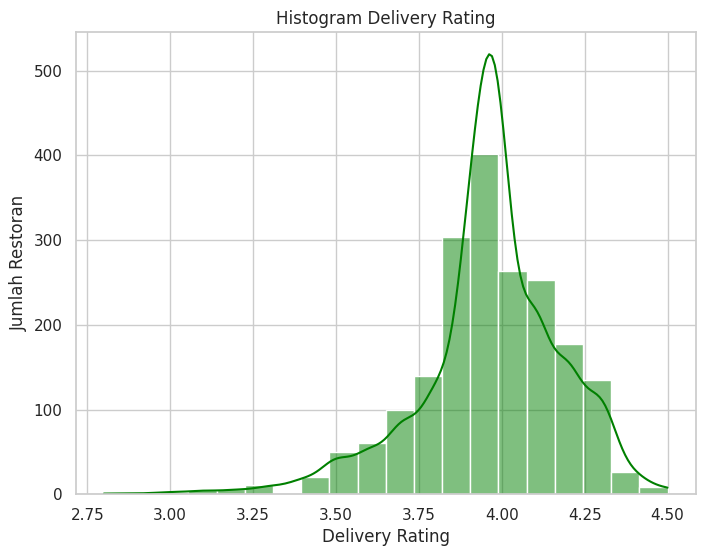

In [ ]:
plt.figure()
sns.histplot(df['Delivery_Rating'].dropna(), bins=20, kde=True, color='green')
plt.title('Histogram Delivery Rating')
plt.xlabel('Delivery Rating')
plt.ylabel('Jumlah Restoran')
plt.show()

Diagram memunjukkan Delivery rating antara 3.8 sampai 4.2, yang berarti kebanyakan pelaggan puas dengan Delivery semua restoran.

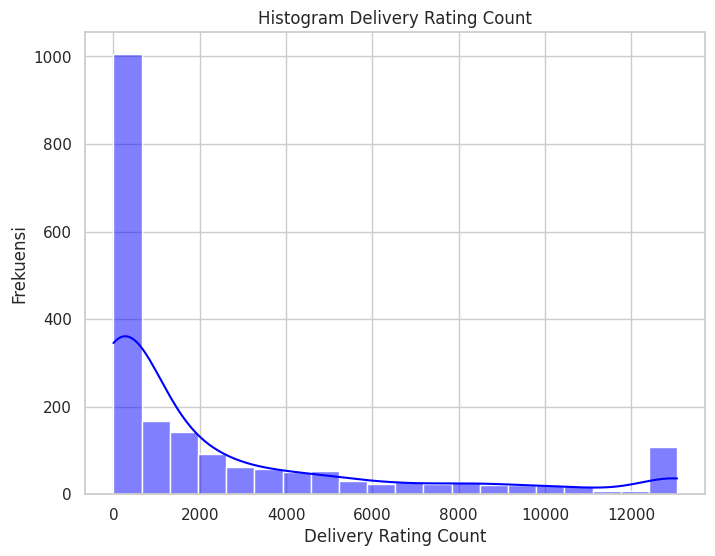

In [ ]:
plt.figure()
sns.histplot(df['Delivery_Rating_Count'].dropna(), bins=20, kde=True, color='blue')
plt.title('Histogram Delivery Rating Count')
plt.xlabel('Delivery Rating Count')
plt.ylabel('Frekuensi')
plt.show()

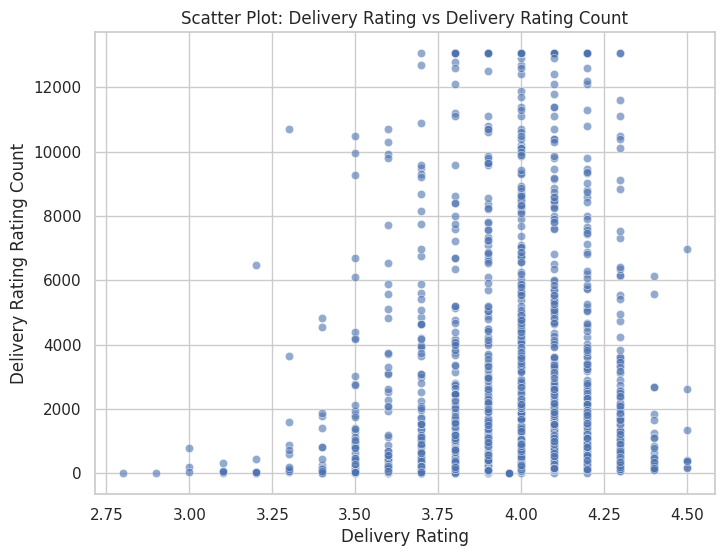

In [ ]:
plt.figure()
sns.scatterplot(x='Delivery_Rating', y='Delivery_Rating_Count', data=df, alpha=0.6)
plt.title('Scatter Plot: Delivery Rating vs Delivery Rating Count')
plt.xlabel('Delivery Rating')
plt.ylabel('Delivery Rating Rating Count')
plt.show()

### Visualisasi Price for 2

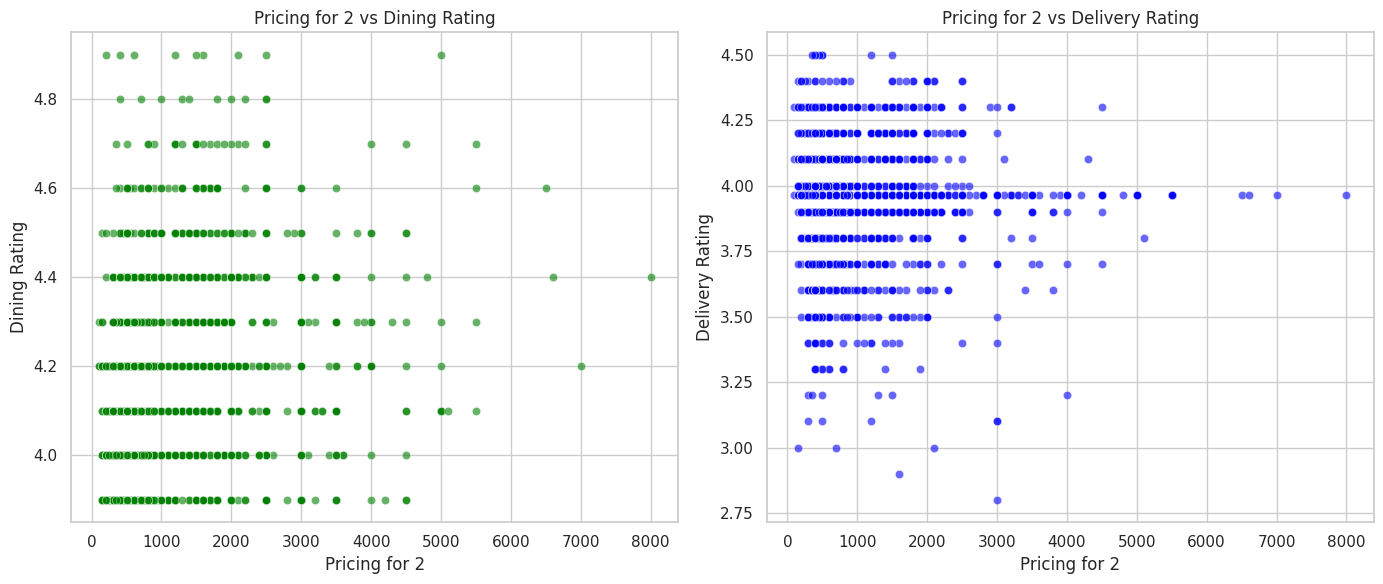

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(14, 6))

# Scatter plot: Pricing vs Dining Rating
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Pricing_for_2', y='Dining_Rating', alpha=0.6, color='green')
plt.title('Pricing for 2 vs Dining Rating')
plt.xlabel('Pricing for 2')
plt.ylabel('Dining Rating')

# Scatter plot: Pricing vs Delivery Rating
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Pricing_for_2', y='Delivery_Rating', alpha=0.6, color='blue')
plt.title('Pricing for 2 vs Delivery Rating')
plt.xlabel('Pricing for 2')
plt.ylabel('Delivery Rating')

plt.tight_layout()
plt.show()

## Boxplot

Bagian ini berfungsi untuk melihat outlier melalui boxplot, outlier nantinya akan dihilangkan untuk memaksimalkan akurasi pelatihan.

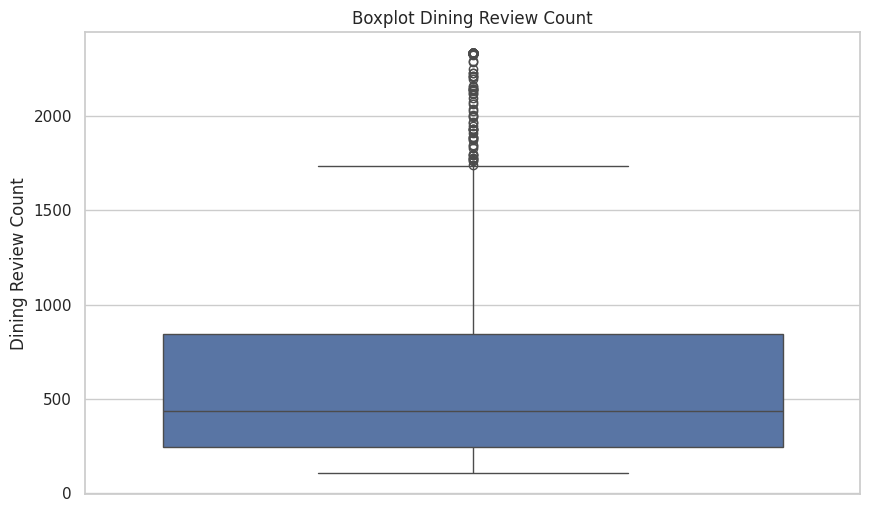

In [ ]:
# Boxlot untuk Dining Review Count
plt.figure(figsize=(10,6))
sns.boxplot(y=df['Dining_Review_Count'])
plt.title('Boxplot Dining Review Count')
plt.ylabel('Dining Review Count')
plt.show()

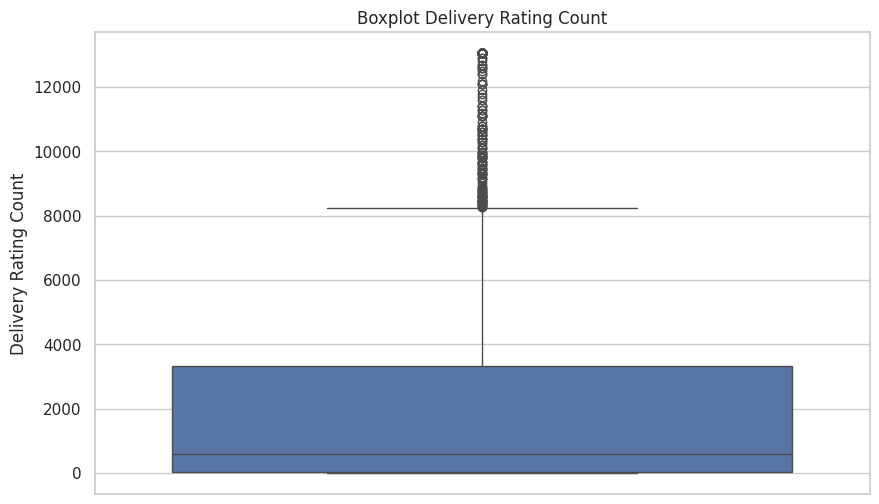

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df['Delivery_Rating_Count'])
plt.title('Boxplot Delivery Rating Count')
plt.ylabel('Delivery Rating Count')
plt.show()

# 4. Data Preposesing

In [14]:
# Target Encoding untuk kolom Category
category_means = df.groupby('Category', observed=False)['Dining_Rating'].mean()

df['Category_TargetEncoded'] = df['Category'].map(category_means)
display(df[['Category', 'Category_TargetEncoded']].head())

,Category,Category_TargetEncoded
0,"Parsi, Street Food, North Indian, Desserts, Be...",4.9
1,"Cafe, South Indian, North Indian, Beverages",4.9
2,"Mughlai, North Indian, Desserts",4.9
3,"Asian, Burmese, Bubble Tea, Desserts, Salad",4.9
4,"Continental, American, Italian",4.9


In [15]:
# Target Encoding untuk Kolom locality
locality_means = df.groupby('Locality', observed=False)['Delivery_Rating'].mean()

df['Locality_TargetEncoded'] = df['Locality'].map(locality_means)
df['Locality_TargetEncoded'] = df['Locality_TargetEncoded'].round(1)
display(df[['Locality','Locality_TargetEncoded']].head())

,Locality,Locality_TargetEncoded
0,"ITO, New Delhi",4.4
1,"Pragati Maidan, New Delhi",3.9
2,"ITC Maurya, Chanakyapuri, New Delhi",4.0
3,"Cyber Hub, DLF Cyber City, Gurgaon",4.0
4,"Khan Market, New Delhi",4.1


Encoding wajib dilakukan karena model regresi hanya menerima nilai numeric.
Target encoding mengubah kolom berdasarkan target yang dipilih, dalam hal ini Dining_Rating dan Delivery_Rating

In [16]:
df.drop(['Category','Locality'], axis=1, inplace=True)

kolom Category dan Locality yang sudah di encode akan dihapus karena model yang akan kita buat hanya menerima nilai numeric

## Menambah fitur mean_rating

In [17]:
dining_rating = df['Dining_Rating']
delivery_rating = df['Delivery_Rating']

mean_rating = (dining_rating + delivery_rating)/2
df['mean_rating'] = mean_rating
df['mean_rating'] = df['mean_rating'].round(1)

mean rating dibuat, untuk mendapatkan nilai akurasi yang lebih tinggi

# 5. Splitting data

In [18]:
X = df.drop(['mean_rating', 'Dining_Rating', 'Delivery_Rating'], axis=1)
y = df['mean_rating']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

Disini data dibagi menjadi Training dan testing dengan perbandingan 80:20

## melakukan standarisasi

In [19]:
numeric_column = ['Pricing_for_2', 'Dining_Review_Count', 'Delivery_Rating_Count',
                  'Category_TargetEncoded','Locality_TargetEncoded']
scaler = StandardScaler()
df[numeric_column]= scaler.fit_transform(df[numeric_column])

Standarisasi dilakukan untuk menyetarakan semua skala dari kolom

# 6. Model Selection

In [20]:
# Linear Regression
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred_linear= linear.predict(X_test)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb =  gb_model.predict(X_test)

Disini masing-masing model akan dijalankan

# 7. Evaluasi Model

In [21]:
# Evaluasi model Linear Regression
mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_linear)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

MSE: 0.011732630406702327
RMSE: 0.10831726735245091
R-squared: 0.5143931241263064


In [22]:
# Evaluasi model Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'MSE (Random Forest): {mse_rf}')
print(f'RMSE (Random Forest): {rmse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')

MSE (Random Forest): 0.011859347457627099
RMSE (Random Forest): 0.10890063111675294
R-squared (Random Forest): 0.5091483777151049


In [23]:
# Evaluasi Model Gradient Bossting
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'MSE (Gradient Boosting): {mse_gb}')
print(f'RMSE (Gradient Boosting): {rmse_gb}')
print(f'R-squared (Gradient Boosting): {r2_gb}')

MSE (Gradient Boosting): 0.011063820940422877
RMSE (Gradient Boosting): 0.10518469917446585
R-squared (Gradient Boosting): 0.542074766197737


Model di tes satu persatu untuk mengetahui model dengan nilai terbaik.